- Invoice ID	: 자동 생성 식별 번호
- Branch : 지사 명
- City : 마켓이 위치한 도시 이름 
- Customer type : 
    - Member  : 회원카드 사용
    - Normal  : 회원카드 미사용
- Gender : 성별
- Product line: 품목 분류
- Unit price : 단가
- Quantity : 수량
- Tax 5% : 세금 5%
- Total : 전체 금액
- Date : 날짜
- Time : 시간 
- Payment : 결제방법
- cogs : 매출원가
- gross margin percentage : 이익률
- gross income : 이익
- Rating : 고객에 평가한 쇼핑경험에 대한 점수(1~10)

In [232]:
import pandas as pd
data = pd.read_csv('supermarket.csv')
df = data
df
#일단 데이터가 뭐뭐 있는지 봐보자

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [233]:
import datetime
import time

In [234]:
df.isnull().sum() #누락값 없네

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [235]:
df.nunique()     #다 다른 id, 도시당 지점이라 같은 두 칼럼이 같은속성이니 한개로 취급해도 될듯?

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [236]:
df['Gender'].info

<bound method Series.info of 0      Female
1      Female
2        Male
3        Male
4        Male
        ...  
995      Male
996    Female
997      Male
998      Male
999    Female
Name: Gender, Length: 1000, dtype: object>

In [237]:
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [238]:
df['Date'].info

<bound method Series.info of 0       1/5/2019
1       3/8/2019
2       3/3/2019
3      1/27/2019
4       2/8/2019
         ...    
995    1/29/2019
996     3/2/2019
997     2/9/2019
998    2/22/2019
999    2/18/2019
Name: Date, Length: 1000, dtype: object>

In [239]:
df['Time'].info

<bound method Series.info of 0      13:08
1      10:29
2      13:23
3      20:33
4      10:37
       ...  
995    13:46
996    17:16
997    13:22
998    15:33
999    13:28
Name: Time, Length: 1000, dtype: object>

In [240]:
#대소문자랑 공백없이 잘 되있는듯

1데이터 기획
2데이터 수집
3데이터 관리
4데이터 가공 및 분석
5데이터 시각화

In [241]:
df['Total'].describe() #매출 요약좀 봐볼까 
# iqr 520.3918125 최소랑 최대값을 이상값으로 보고 걔네만 그래프로 봐도 될듯? 매출 안나오는 이유나 잘나가는 비결같은거?
#Total > 991.7420625 이면 이상값 밑으로 이상값은 없네

count    1000.000000
mean      322.966749
std       245.885335
min        10.678500
25%       124.422375
50%       253.848000
75%       471.350250
max      1042.650000
Name: Total, dtype: float64

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt

In [243]:
#1 성별별,도시별, 회원유무, 품목별, 결제방법, 만족도, 수량정도가 기준점이 될만한 칼럼인것 같다

#2 매출 너무안나오는지점이 있네

In [244]:
#무엇을 기준으로 그래프를 봐볼까

In [245]:
#1.매출 토탈 도시별 (남,녀)  바 o
#2.매출토탈 상품별(님,녀) 바
#3.남녀별 결제수단 횟수
#4.수량 품목별(남녀) 바?
#5.이익 품목별 남녀 바?
#6.지역에 따른 만족도 남녀 바
#7.품목별 만족도 남녀  바
#8.매출토탈 시간별 남녀 바이올렛 라인
#9.매출토탈 멤버유무 스캐터?
#11 데이트별 토탈매출 라인차트
#12평균매출 이상지점 품목별 매출 지역 남녀 만족도 
#13 12번 특이점을 매출 최소지점과 비교
#남녀별 멤버가입유무 등등 만들면 좋을지도

<AxesSubplot:xlabel='City', ylabel='mean_total'>

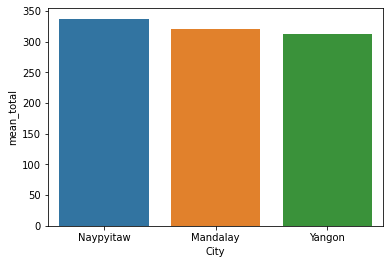

In [246]:
#그래프1 도시별 평균매출
df_TM = df.groupby('City', as_index = False).agg(mean_total = ('Total', 'mean')).sort_values(by = 'mean_total', ascending = False)
sns.barplot(data = df_TM, x = 'City', y = 'mean_total')

In [247]:
#인사이트1: 도시별 평균매출이 차이가 크진 않지만 Naypyitaw 지역은 다른 지역보다 평균적으로 조금 매출이 더 나오는것 같다

<AxesSubplot:xlabel='Customer type', ylabel='count'>

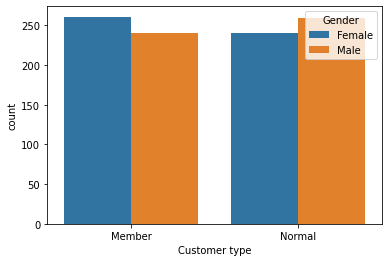

In [248]:
#그래프2 성별별 멤버십 가입수
sns.countplot(data = df.sort_values(by = 'Customer type'), x='Customer type', hue = 'Gender') 

In [249]:
#인사이트2: 남자가 여자보다 더 멤버십에 가입했다

<AxesSubplot:xlabel='Product line', ylabel='sum_total'>

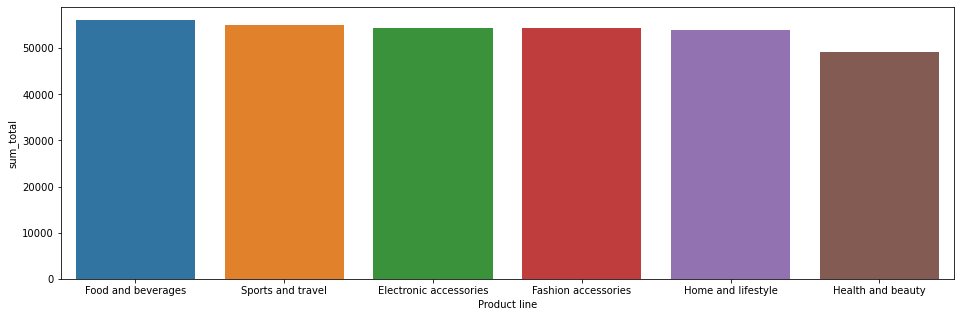

In [250]:
#그래프3 품목별 매출합
plt.figure(figsize=(16,5))
df_TS = df.groupby('Product line', as_index = False).agg(sum_total = ('Total', 'sum')).sort_values(by = 'sum_total', ascending = False)
sns.barplot(data = df_TS, x = 'Product line', y = 'sum_total')

In [251]:
#인사이트3:매출합 상위 5품목은 차이가 적지만 Food and beverages가 가장 많이 팔리고 Helth and beauty가 가장 매출이 적다

<AxesSubplot:xlabel='Payment', ylabel='count'>

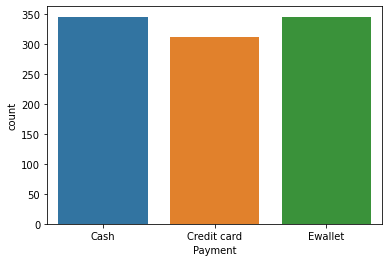

In [252]:
#그래프4
sns.countplot(data = df.sort_values(by = 'Payment'), x='Payment') 

In [253]:
#인사이트4: 차이는 적지만 신용카드결제횟수가 가장 작고 현금과 전자지갑의 횟수가 비슷하다

<AxesSubplot:xlabel='Payment', ylabel='count'>

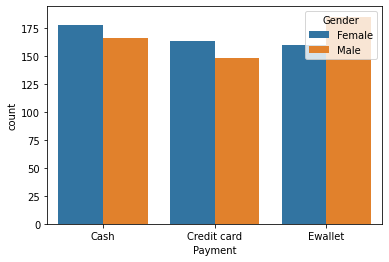

In [254]:
#그래프5
sns.countplot(data = df.sort_values(by = 'Payment'), x='Payment', hue = 'Gender')

In [255]:
#인사이트5:차이가 크진 않지만 남자는 전자지갑이 사용횟수가 가장 높고 여자는 현금사용이 높다

<AxesSubplot:xlabel='Branch', ylabel='mean_rating'>

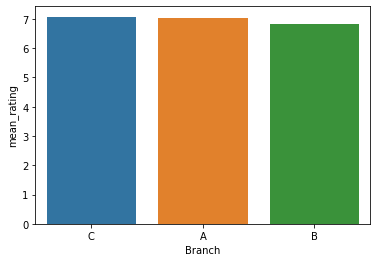

In [256]:
#그래프6
df_RM = df.groupby('Branch', as_index = False).agg(mean_rating = ('Rating', 'mean')).sort_values(by = 'mean_rating', ascending = False)
sns.barplot(data = df_RM, x = 'Branch', y = 'mean_rating')

In [257]:
#인사이트6: c지점이 a지점보다 근소하게 높으나 차이는 거의 없지만 b지점은 다른 두지점에 비해 사람들의 만족도가 조금 낮다. 
#          다른지점의 만족도 높은이유를 찾아내어 개선을 하면 좋겠다.


<AxesSubplot:xlabel='Product line', ylabel='mean_rating'>

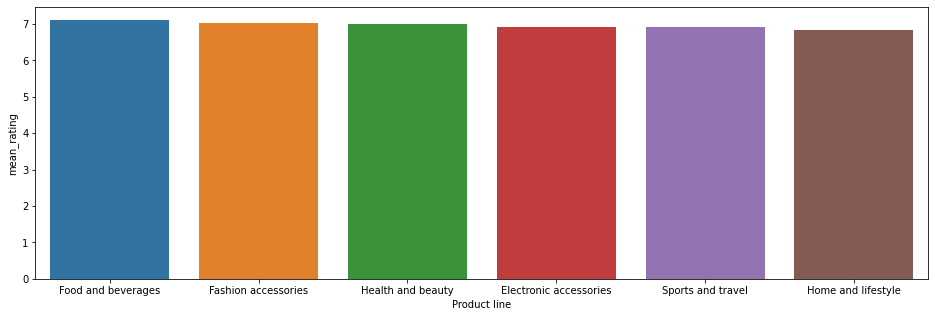

In [258]:
#그래프7
plt.figure(figsize=(16,5))
df_RBM = df.groupby('Product line', as_index = False).agg(mean_rating = ('Rating', 'mean')).sort_values(by = 'mean_rating', ascending = False)
sns.barplot(data = df_RBM, x = 'Product line', y = 'mean_rating')

In [259]:
#인사이트7: 사람들이 상품에 대해서는 대체적으로 만족하는것 같음

In [260]:
df['Date'] = pd.to_datetime(df['Date']) #그래프 망가져서 데이트타임변환

<AxesSubplot:xlabel='Date', ylabel='Total'>

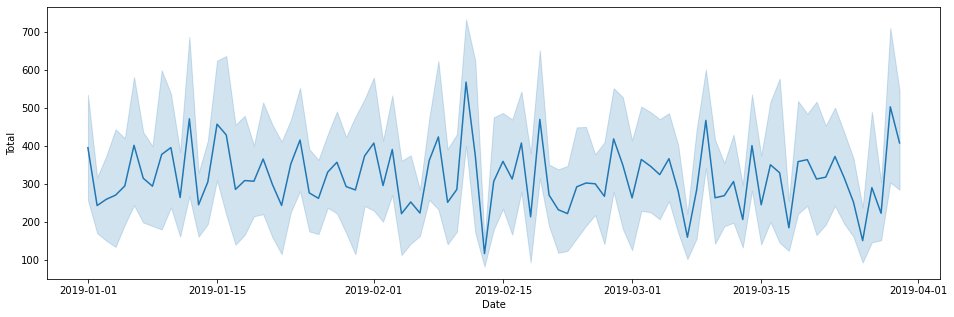

In [261]:
#그래프8
plt.figure(figsize=(16,5))
sns.lineplot(data = df, x = 'Date', y = 'Total')

In [262]:
#인사이트 8: 1~4월까지의 매출이 일정하지 않고 오르락 내리락 하고있다. 낙차가 크다. 

In [263]:
#상품에 대해서는 문제가 없는것 같다. 매출이 일정하지 않고 만족도 또한 높은 것을 보면 마케팅쪽의 문제가 아닐까한다.
#멤버쉽 카드 가입 안한사람을 끌어들일수 있는 신규 가입자 혜택증가 같은 마케팅
#주로 사용되는 전자지갑이나 가장 적게 사용되는 신용카드 제휴사와의 연계 이벤트
#마진이 큰 상품을 사면 작은상품을 주는 이벤트등 마케팅을 더욱 강화하고 가장 만족도 높은 지점을 다른 지점들이 보게해여 매출과 만족도
#가 낮은 지점들을 끌어올리는등이 좋을것 같다.